<a href="https://colab.research.google.com/github/SahilBharodiya/Machine_Learning_without_frameworks_in_python/blob/main/Linear_Regression_One_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing required libraries

In [ ]:
import pandas as pd  # For reading csv files
import numpy as np  # Array related work
import matplotlib.pyplot as plt  # Plotting curves
from math import sqrt  # For error analysis

### Data preprocessing

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML without framworks/train_LR-one-variable.csv')  # Training data
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML without framworks/test_LR-one-variable.csv')  # Testing data

In [ ]:
train = train.dropna()  # Removing NaN values
test = test.dropna()  # Removing NaN values

### Data Normalisation

### $x = \frac{x - mean} {max(X) - min(X)}$

In [ ]:
def mean(x):  # Calculating Mean
    return sum(x) / len(x)

def Range(x):  # Calculating Range
    return abs(max(x) - min(x))

In [ ]:
# Converting to Numpy array

train_X = train['x']
train_y = train['y']

test_X = test['x']
test_y = test['y']

train_X = np.array(train_X)
train_y = np.array(train_y)

test_X = np.array(test_X)
test_y = np.array(test_y)

In [ ]:
train_X = (train_X - mean(train_X)) / Range(train_X)
train_y = (train_y - mean(train_y)) / Range(train_y)

test_X = (test_X - mean(test_X)) / Range(test_X)
test_y = (test_y - mean(test_y)) / Range(test_y)

### Creating Hypothesis Function
$h_\theta(x) = \theta_0 + \theta_1x $

In [ ]:
def h_theta(x, theta0, theta1):
    return theta0 + theta1 * x

#### Random initialisation of $\theta_0$ and $\theta_1$ and setting $\alpha$ (learning rate)

In [ ]:
theta0 = 0
theta1 = 0

alpha = 0.001
m = len(train)

#### Keep changing $\theta_0$ and $\theta_1$ upto given iteration

In [ ]:
change_in_theta0 = 1.0
change_in_theta1 = 1.0

while True:
    if (change_in_theta0 < 0.0000001) and (change_in_theta1 < 0.0000001):
        break
    else:
        temp_theta0 = theta0
        temp_theta1 = theta1

        J1 = 0
        J2 = 0
        for i in range(m):
            J1 += h_theta(train_X[i], theta0, theta1) - train_y[i]
            J2 += (h_theta(train_X[i], theta0, theta1) - train_y[i]) * train_X[i]

        theta0 = theta0 - alpha * J1 / m
        theta1 = theta1 - alpha * J2 / m

        change_in_theta0 = abs(temp_theta0 - theta0)
        change_in_theta1 = abs(temp_theta1 - theta1)

        print(theta0, theta0)
print("Done")

#### Plotting Data and Prediction

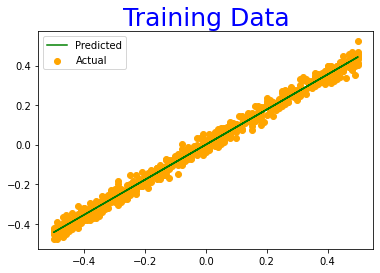

In [ ]:
plt.title("Training Data", color='blue', size=25)
plt.scatter(train_X, train_y, label='Actual', color='orange')
plt.plot(train_X, [h_theta(i, theta0, theta1) for i in train_X], label='Predicted', color='green')
plt.legend()
plt.show()

### Calculating Root Mean Square Error (RMSE)

### $RMSE = \sqrt\frac{\sum_{i=1}^m (\bar{y} - y)^2} {m}$

In [ ]:
predicted = [h_theta(i, theta0, theta1) for i in test_X]

In [ ]:
error = 0
for i in range(len(test)):
    error += (predicted[i] - test_y[i]) ** 2
    
error = "%0.2f" % sqrt(error / len(test))

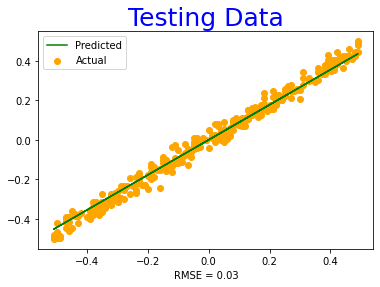

In [ ]:
plt.title("Testing Data", color='blue', size=25)
plt.xlabel(f'RMSE = {error}')
plt.scatter(test_X, test_y, label='Actual', color='orange')
plt.plot(test_X, predicted, label='Predicted', color='green')
plt.legend()
plt.show()

#### Derivation of Gradient Descent is in [this pdf](https://github.com/SahilBharodiya/Machine_Learning_without_frameworks_in_python/blob/main/Gradient%20Descent%20Linear%20Regression.pdf)